# **Title:** Model Reproducibility


**Aim:**

*   To employ and implement the model as described by the authors, as well as reproduce some important results.


**Reference:**


*   The resources from the model's author(s) on how to install and implement the model(SolTranNet) can be found [here](https://github.com/gnina/SolTranNet/blob/main/README.md)


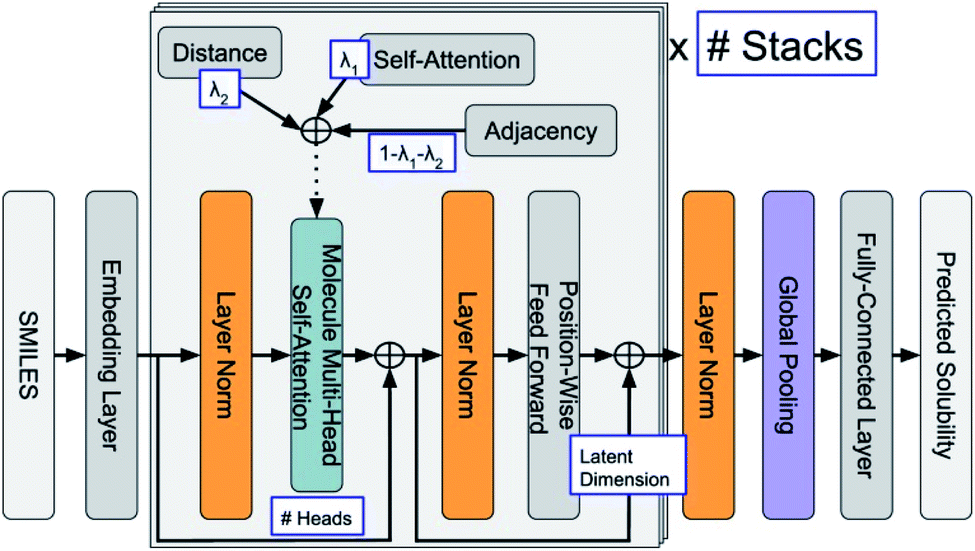

**By Nwuguru Chidiebere Sullivan**

---



# Installing Important Libraries

In [1]:
#install rdkit
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 12.9 MB/s eta 0:00:00


In [2]:
#install SolTranet
!pip install soltrannet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 887.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [14]:
#let's first install standardiser
!pip install standardiser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.4/698.4 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for standardiser: filename=standardiser-0.1.9-py3-none-any.whl size=720101 sha256=e6673ecb380109f970a8aa73d50244164725da369f4aaa873737f0ce7806c751
  Stored in directory: /root/.cache/pip/wheels/eb/62/4b/6044430bf5a732d53bd0d1aa165c928954d9f87cd92529f00f
Successfully built standardiser




---



# importing The Necessary Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import soltrannet as stn
import sys
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from prettytable import PrettyTable
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, balanced_accuracy_score
import glob
sys.path.append('/content/drive/MyDrive/ersilia/src')

_ = sys.path.append("/usr/local/lib/python3.7/site-packages")



---



# Getting The Overview Of The Data

In [4]:
# @title 🗂️ Let's mount our Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**🛠️ Setting up folders and paths:**

In [5]:
#specify input folder
input_folder = '/content/drive/MyDrive/ersilia/data'

#specify the name of the input file
input_filename = "1000_molecules"

#specify the name of the SMILE column
smiles_column = 'smiles'

In [6]:
# @title 🔃 Let's load our dataset into a DataFrame and have a view of it
mol_df = pd.read_csv('/content/drive/MyDrive/ersilia/data/1000_molecules.csv')
mol_df.head()

,Solubility,smiles,Inchi_Key
0,-6.377738,COC(=O)c1cc(N=NC(C(C)=O)C(=O)Nc2ccc3[nH]c(=O)[...,IHRACTUONPFMSI-UHFFFAOYSA-N
1,-2.300000,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N
2,-0.658699,CCCCCCOC1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O,JVAZJLFFSJARQM-OZRWLHRGSA-N
3,-6.493900,CCOc1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-],OQMBBFQZGJFLBU-UHFFFAOYSA-N
4,-0.388000,Cc1cccc(CO)c1,JJCKHVUTVOPLBV-UHFFFAOYSA-N


In [7]:
# @title Let's check how many smiles😄 we have in our data
smiles = mol_df[smiles_column].tolist()

print(f"My dataset contains {str(len(smiles)) + ' ' + 'SMILES'}")

My dataset contains 1000 SMILES


In [8]:
# @title Let's confirm if all the smiles😄 are valid
from rdkit import Chem

def is_smiles(smiles):
    return Chem.MolFromSmiles(smiles) is not None
all_valid = all(is_smiles(i) for i in smiles)

if all_valid:
    print("All samples are valid SMILES")
else:
    print("Not all samples are valid SMILES")

All samples are valid SMILES




---



# Testing The Model(SolTranNet)

In [9]:
# @title Let's start by testing a simple prediction on the model(SolTranet) to be sure it's working properely
my_smiles=["c1ccccc1","c1ccccc1 .ignore","Cn1cnc2n(C)c(=O)n(C)c(=O)c12","[Zn+2]","[Na+].[Cl-]"]
pred=list(stn.predict(my_smiles))
pred

[(-1.052748441696167, 'c1ccccc1', ''),
 (-1.052748441696167, 'c1ccccc1 .ignore', ''),
 (-1.1322435140609741, 'Cn1cnc2n(C)c(=O)n(C)c(=O)c12', ''),
 (-6.881844520568848,
  '[Zn+2]',
  'Other-typed Atom(s) Detected Prediction less reliable'),
 (-0.16869044303894043,
  '[Na+].[Cl-]',
  'Salt Other-typed Atom(s) Detected Prediction less reliable')]

***Comments:***

*   The model works very fine.



---



# Employing The Model (SolTranet):

In [10]:
#let's run a prediction on the smiles column of the dataset using our model
predictions = list(stn.predict(smiles))

#let's the first 10 values of our predictions
predictions[:10]

[(-6.123292446136475,
  'COC(=O)c1cc(N=NC(C(C)=O)C(=O)Nc2ccc3[nH]c(=O)[nH]c3c2)cc(C(=O)OC)c1',
  ''),
 (-2.315873622894287, 'CCOc1ccc(NC(C)=O)cc1', ''),
 (-0.4835383892059326, 'CCCCCCOC1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O', ''),
 (-6.8311614990234375, 'CCOc1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-]', ''),
 (-0.7085232734680176, 'Cc1cccc(CO)c1', ''),
 (-0.07349371910095215, 'CC(C)(C)OC(N)=O', ''),
 (-7.000503063201904, 'Clc1ccccc1-c1c(Cl)ccc(Cl)c1Cl', ''),
 (-3.05261492729187, 'CC(C)CCCC(C)CC=O', ''),
 (-6.136777877807617, 'O=C(O)c1cccc2cccc(-c3cccc4cccc(C(=O)O)c34)c12', ''),
 (-1.2112153768539429, 'CNC(=O)O/N=C(/C)C(C)SC', '')]

**Let's convert our predictions from a list to a DataFrame and save it as a CSV file:**

In [11]:
#convert from list to dataframe
predictions_df = pd.DataFrame(predictions,columns=["soltra_solubility", "smiles", "true_values"])

#save as a CSV file
path = '/content/drive/MyDrive/ersilia/data/Soltranet_pred.csv'
predictions_df.to_csv(path, sep=',', index=False, encoding='utf-8')

#print
predictions_df.head()

,soltra_solubility,smiles,true_values
0,-6.123292,COC(=O)c1cc(N=NC(C(C)=O)C(=O)Nc2ccc3[nH]c(=O)[...,
1,-2.315874,CCOc1ccc(NC(C)=O)cc1,
2,-0.483538,CCCCCCOC1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O,
3,-6.831161,CCOc1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-],
4,-0.708523,Cc1cccc(CO)c1,




---



# SolTranNet's Bias Evaluation:


In this section, we will:

*   employ the predicted output from the model(SolTranNet) by running through the randomly sampled 1000 molecules within the Ersilia Model Hub and see what the distribution of these output predictions is like.
*   evaluate the performance of the model by comparing the predicted output and the actual values.



**NOTE:**

*   For the context of the evaluations below, we should note that compounds whose Log of Solibulity(LogS) values are within the range of 0 and above are classified as highly soluble compounds, those whose LogS values are within the range of 0 to –2 are classified as soluble compounds, while those whose LogS values are within the range of –2 to –4 are classified as slightly soluble compounds, and those with LogS values below –4 as insoluble compounds.

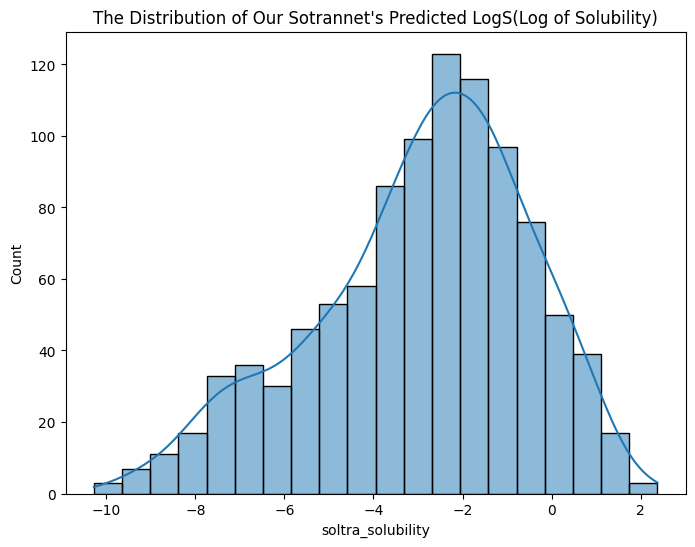

In [12]:
# @title 📊 Let's employ a histogram plot to visualize the distribution of our predictions
fig = plt.figure(figsize=(8,6))
sns.histplot(data=predictions_df, x='soltra_solubility', bins=20, kde=True)
plt.title("The Distribution of Our Sotrannet's Predicted LogS(Log of Solubility)")
plt.savefig('/content/drive/MyDrive/ersilia/figures/soltra_hist_plot.png')
plt.show();

***COMMENTS:***

*   We can see from the distributions of the predicted log of solubility values, that the majority of the compounds fall within the range of –4 and –2, thus, implying that many of the compounds are slightly soluble.
*   The visualisation is the same as what we got from eos6oli acting.



In [15]:
# @title let's import a function called solubility_category which will help categorise the solubility values
from functions import solubility_category

*Important background note about the function, solubility_category:*

*   The function, 'solubility_category', which is stored in the [src folder](https://github.com/Nwuguru-Chidiebere-Sullivan/Outreachy-Ersilia-Project-Week2-Tasks/blob/main/src/functions.py), is defined based on the context of the solubility values evaluations as described in the publication, which implies that:
> compounds whose Log of Solibulity(LogS) values are within the range of 0 and above are classified as highly soluble compounds, those whose LogS values are within the range of 0 to –2 are classified as soluble compounds, while those whose LogS values are within the range of –2 to –4 are classified as slightly soluble compounds, and those with LogS values below –4 as insoluble compounds.

**Let's now apply the function on the solubility column of our predicted output and visualize it on a pie chart to see which category has the most distribution of values:**

Slightly Soluble    325
Soluble             293
Insoluble           286
Highly Soluble       96
Name: Solubility_degree, dtype: int64


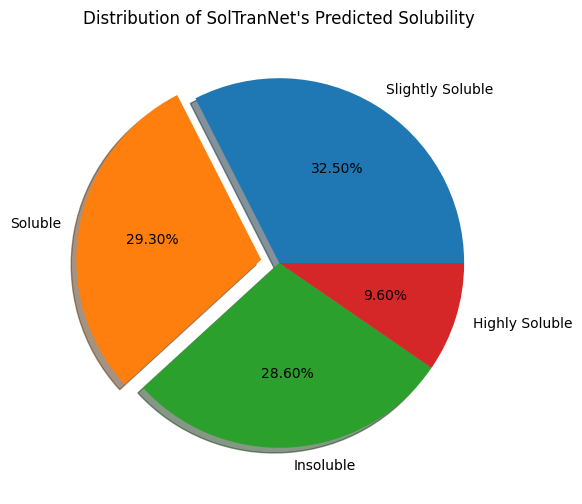

In [16]:
# Apply the categorization function to create a new column
predictions_df['Solubility_degree'] = predictions_df['soltra_solubility'].apply(solubility_category)

#let's visualize the distribution according to their degree of solubility
degree_of_solubilty = predictions_df.Solubility_degree.value_counts()
print(degree_of_solubilty)

#create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    labels = degree_of_solubilty.index,
    x = degree_of_solubilty.values,
    shadow=True,
    autopct = "%.2f%%",
    explode = (0, 0.1,0,0)
)
plt.title("Distribution of SolTranNet's Predicted Solubility")
plt.savefig('/content/drive/MyDrive/ersilia/figures/soltra_pie_chart.png')
plt.show();

***COMMENTS:***

*   From the graph, we can see that there more compounds that fall within the slightly soluble category.
*   The visualisation is the same as what we got from eos6oli acting.

---



# Model(eso6oli) Reproducibility

*   Although from the few visualizations, we've generated from evaluating SolTranNet's predictions when deployed according to the author's instruction, we can already infer that eso6oli which we implemented earlier through Ersilia Model Hub is reproducible, but to further confirm this assumption, we will go ahead to compare the performance metrics of both models, as well as compare both actual and the predicted solubility values from both to see if they are identitical.



**Let's compare the predicted solubility values:**




In [17]:
# @title Let's begin by importing our predictions and merging both into a single dataframe
soltra_pred_df = pd.read_csv('/content/drive/MyDrive/ersilia/data/Soltranet_pred.csv')
eos_pred_df = pd.read_csv('/content/drive/MyDrive/ersilia/data/1000_molecules_predictions.csv')



In [18]:
eos_pred_df.head()

,key,input,solubility
0,IHRACTUONPFMSI-UHFFFAOYSA-N,COC(=O)c1cc(N=NC(C(C)=O)C(=O)Nc2ccc3[nH]c(=O)[...,-6.123
1,CPJSUEIXXCENMM-UHFFFAOYSA-N,CCOc1ccc(NC(C)=O)cc1,-2.316
2,JVAZJLFFSJARQM-OZRWLHRGSA-N,CCCCCCOC1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O,-0.484
3,OQMBBFQZGJFLBU-UHFFFAOYSA-N,CCOc1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-],-6.831
4,JJCKHVUTVOPLBV-UHFFFAOYSA-N,Cc1cccc(CO)c1,-0.709


In [19]:
soltra_pred_df.head()

,soltra_solubility,smiles,true_values
0,-6.123292,COC(=O)c1cc(N=NC(C(C)=O)C(=O)Nc2ccc3[nH]c(=O)[...,NaN
1,-2.315874,CCOc1ccc(NC(C)=O)cc1,NaN
2,-0.483538,CCCCCCOC1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O,NaN
3,-6.831161,CCOc1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-],NaN
4,-0.708523,Cc1cccc(CO)c1,NaN


In [20]:
#let's rename the solubility column of the eos_pred_df
eos_pred_df.rename(columns={'solubility': 'eos_solubility'}, inplace=True)

#let's drop the true_values column in the soltra_pred_df
soltra_pred_df.drop(columns=['true_values'], inplace=True)

In [21]:
#let's merge the both DataFrame
repro_df = pd.merge(soltra_pred_df, eos_pred_df, how='left', left_on='smiles', right_on='input')
repro_df.drop(columns=['input'], inplace=True)
repro_df.head()

,soltra_solubility,smiles,key,eos_solubility
0,-6.123292,COC(=O)c1cc(N=NC(C(C)=O)C(=O)Nc2ccc3[nH]c(=O)[...,IHRACTUONPFMSI-UHFFFAOYSA-N,-6.123
1,-2.315874,CCOc1ccc(NC(C)=O)cc1,CPJSUEIXXCENMM-UHFFFAOYSA-N,-2.316
2,-0.483538,CCCCCCOC1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O,JVAZJLFFSJARQM-OZRWLHRGSA-N,-0.484
3,-6.831161,CCOc1cc(Oc2ccc(C(F)(F)F)cc2Cl)ccc1[N+](=O)[O-],OQMBBFQZGJFLBU-UHFFFAOYSA-N,-6.831
4,-0.708523,Cc1cccc(CO)c1,JJCKHVUTVOPLBV-UHFFFAOYSA-N,-0.709


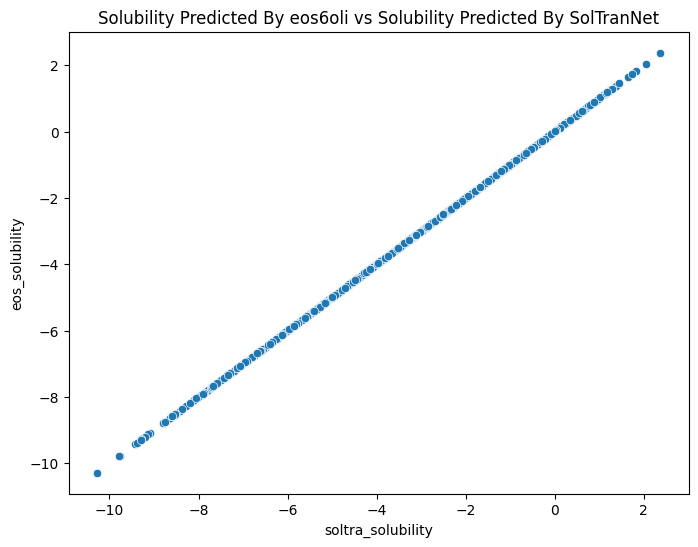

In [22]:
# @title Let's generate a scatter plot to visualise how close the both predicted values are
plt.figure(figsize=(8, 6))
sns.scatterplot(x='soltra_solubility', y='eos_solubility', data=repro_df)
plt.title('Solubility Predicted By eos6oli vs Solubility Predicted By SolTranNet')
plt.xlabel('soltra_solubility')
plt.ylabel('eos_solubility')

plt.savefig('/content/drive/MyDrive/ersilia/figures/repro_scatter_plot.png')
plt.show()

***COMMENTS:***

*   From the scatter plot, we can see that the predicted values are identical, thus affirming the notion of the reproducibility of the model since the predicted values generated by the model(eos6oli) remained the same when implemented as SolTranNet, in line with the author's guidelines.




# **Compare The Performance Metrics of Both Models:**

In [25]:
threshold = -4

test_data = pd.read_csv('/content/drive/MyDrive/ersilia/data/1000_molecules.csv')


metrics = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "Balanced Accuracy"]

table = PrettyTable()
table.field_names = metrics

models = [
    {"name": "eos6oli", "y_pred": eos_pred_df['eos_solubility']},
    {"name": "SolTranNet", "y_pred": soltra_pred_df['soltra_solubility']}
]

for model in models:
    table.add_row([model["name"], "", "", "", "", "", "",])

    y_pred = model["y_pred"]
    y_pred_binary = model['y_pred'].apply(lambda x: 1 if x >= threshold else 0)
    y_true = test_data['Solubility'].apply(lambda x: 1 if x >= threshold else 0)


    # Calculating the evaluation metrics
    accuracy = round(accuracy_score(y_true, y_pred_binary), 3)
    precision = round(precision_score(y_true, y_pred_binary), 3)
    recall = round(recall_score(y_true, y_pred_binary), 3)
    f1 = round(f1_score(y_true, y_pred_binary), 3)
    roc_auc = round(roc_auc_score(y_true, y_pred), 3)
    balanced_accuracy = round(balanced_accuracy_score(y_true, y_pred_binary), 3)



    table.add_row(["", accuracy, precision, recall, f1, roc_auc, balanced_accuracy])


print(table)


+------------+----------+-----------+--------+----------+---------+-------------------+
|   Model    | Accuracy | Precision | Recall | F1 Score | ROC AUC | Balanced Accuracy |
+------------+----------+-----------+--------+----------+---------+-------------------+
|  eos6oli   |          |           |        |          |         |                   |
|            |  0.891   |   0.913   | 0.933  |  0.923   |  0.948  |       0.863       |
| SolTranNet |          |           |        |          |         |                   |
|            |  0.891   |   0.913   | 0.933  |  0.923   |  0.948  |       0.863       |
+------------+----------+-----------+--------+----------+---------+-------------------+


# **Conclusion**

*   The model, eso6oli is very reproducible and we can confirm that by how similar and identical the output visualisations, predictions, and performances are with that from the SolTranNet when implemented according to the author's guide.
*   However, the difference I could see between the two models is that SolTranNet when deployed according to the author's guide, runs the predictions much faster than what we see from eos6oli when deployed through Ersilia Model Hub.

